In [1]:
import pywt
import torch
import numpy as np
from models import get_model
from torchview import draw_graph

In [8]:
x = np.random.randn(1, 1, 256, 256).astype(np.float32)
print(x.dtype)
x1, _ = pywt.dwt2(x, 'db1')
x2, _ = pywt.dwt2(x1, 'db1')
x3, _ = pywt.dwt2(x2, 'db1')
x4, _ = pywt.dwt2(x3, 'db1')

float32


In [9]:
x = torch.from_numpy(x)
print(x.dtype)
x1 = torch.from_numpy(x1)
x2 = torch.from_numpy(x2)
x3 = torch.from_numpy(x3)
x4 = torch.from_numpy(x4)

torch.float32


In [10]:
# Simulate input data with wavelet decomposition
input_data = [(x, x1, x2, x3, x4)]

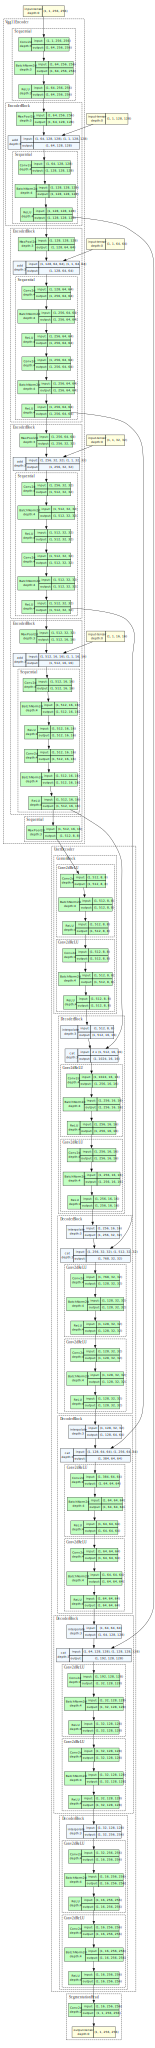

In [11]:
arch = 'unet'
encoder = 'vgg11'
parameters = {"in_channels": 1, "out_channels": 1}
model = get_model(arch, parameters, encoder)
# We are using draw_graph to eval the model graph
model_graph = draw_graph(
    model,
    input_data = input_data,
    #input_size=(1, 1, 256, 256),
    depth=5,
    show_shapes=True,
    expand_nested=True,
    save_graph=True,
    filename=f"{arch}-{encoder}",
    directory="figures",
)
model_graph.visual_graph